In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,6)

In [63]:
monday = pd.read_csv("data/monday.csv", sep = ';')

In [124]:
monday.head(20)

,timestamp,customer_no,location,one,first_location,following_location
0,2019-09-02 07:03:00,1,dairy,1,dairy,False
1,2019-09-02 07:03:00,2,dairy,1,dairy,False
2,2019-09-02 07:04:00,3,dairy,1,dairy,False
3,2019-09-02 07:04:00,4,dairy,1,dairy,False
4,2019-09-02 07:04:00,5,spices,1,spices,False
5,2019-09-02 07:04:00,6,spices,1,spices,False
6,2019-09-02 07:04:00,7,spices,1,spices,False
7,2019-09-02 07:04:00,8,fruit,1,fruit,False
8,2019-09-02 07:05:00,1,checkout,1,dairy,True
9,2019-09-02 07:05:00,5,checkout,1,spices,True


In [25]:
monday.tail()

,timestamp,customer_no,location
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy
4883,2019-09-02 21:50:00,1447,fruit


In [9]:
monday.shape

(4884, 3)

In [66]:
monday['timestamp'] = pd.to_datetime(monday.timestamp)

In [67]:
monday.timestamp.iloc[1] - monday.timestamp.iloc[0]

Timedelta('0 days 00:00:00')

In [68]:
monday.timestamp.shift(1)

0                      NaT
1      2019-09-02 07:03:00
2      2019-09-02 07:03:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
               ...        
4879   2019-09-02 21:49:00
4880   2019-09-02 21:49:00
4881   2019-09-02 21:49:00
4882   2019-09-02 21:49:00
4883   2019-09-02 21:50:00
Name: timestamp, Length: 4884, dtype: datetime64[ns]

In [69]:
monday.timestamp.diff()

0           NaT
1      00:00:00
2      00:01:00
3      00:00:00
4      00:00:00
         ...   
4879   00:00:00
4880   00:00:00
4881   00:00:00
4882   00:01:00
4883   00:00:00
Name: timestamp, Length: 4884, dtype: timedelta64[ns]

## Total number of unique customers

In [17]:
len(monday.customer_no.unique())

1447

## Total number of unique customers by section

In [18]:
monday[['location', 'customer_no']].drop_duplicates().groupby("location").customer_no.count()

location
checkout    1437
dairy        720
drinks       661
fruit        827
spices       584
Name: customer_no, dtype: int64

In [36]:
monday.groupby(['location','timestamp']).customer_no.count().unstack(0)

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,NaN,2.0,NaN,NaN,NaN
2019-09-02 07:04:00,NaN,2.0,NaN,1.0,3.0
2019-09-02 07:05:00,2.0,1.0,1.0,NaN,NaN
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0
2019-09-02 07:07:00,1.0,1.0,1.0,NaN,1.0
...,...,...,...,...,...
2019-09-02 21:46:00,1.0,NaN,2.0,1.0,2.0
2019-09-02 21:47:00,2.0,2.0,NaN,2.0,NaN
2019-09-02 21:48:00,2.0,2.0,2.0,NaN,1.0


## Total number of customers per section over time

In [123]:
monday.groupby(['location','timestamp']).customer_no.count().unstack(0)

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,NaN,2.0,NaN,NaN,NaN
2019-09-02 07:04:00,NaN,2.0,NaN,1.0,3.0
2019-09-02 07:05:00,2.0,1.0,1.0,NaN,NaN
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0
2019-09-02 07:07:00,1.0,1.0,1.0,NaN,1.0
...,...,...,...,...,...
2019-09-02 21:46:00,1.0,NaN,2.0,1.0,2.0
2019-09-02 21:47:00,2.0,2.0,NaN,2.0,NaN
2019-09-02 21:48:00,2.0,2.0,2.0,NaN,1.0


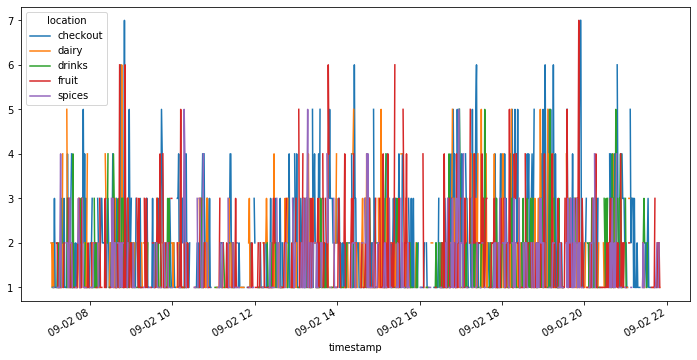

In [223]:
monday.groupby(['location','timestamp']).customer_no.count().unstack(0).plot()

## Number of customers at checkout over time

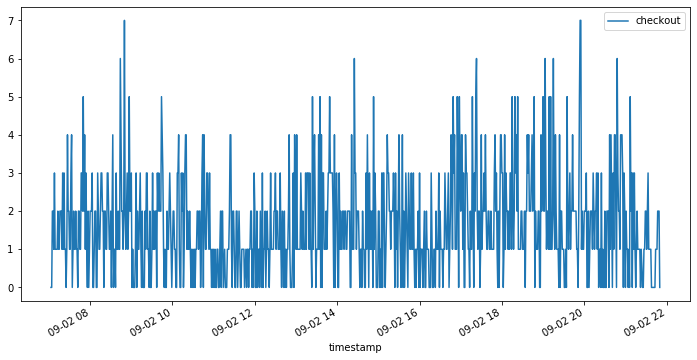

In [121]:
monday.groupby(['location','timestamp']).customer_no.count().unstack(0).checkout.fillna(0).plot(label = 'checkout')
plt.legend()

### Time each customer spent in the supermarket

In [83]:
monday['one'] = 1

Text(0, 0.5, 'Minutes spent in supermarket')

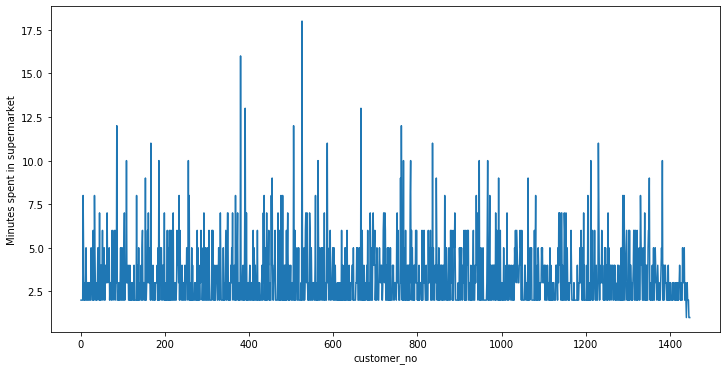

In [126]:
monday.groupby(['customer_no']).one.sum().plot()
plt.ylabel("Minutes spent in supermarket")

Text(0, 0.5, 'Minutes spent in supermarket')

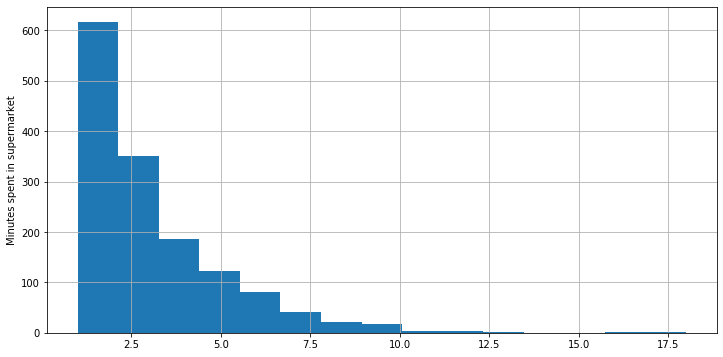

In [129]:
monday.groupby(['customer_no']).one.sum().hist(bins = 15)
plt.ylabel("Minutes spent in supermarket")

In [91]:
monday.groupby(['customer_no']).one.sum().mean()

3.3752591568762957

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


## Total number of customers in supermarket over time

Text(0, 0.5, 'Number of customers in supermarket')

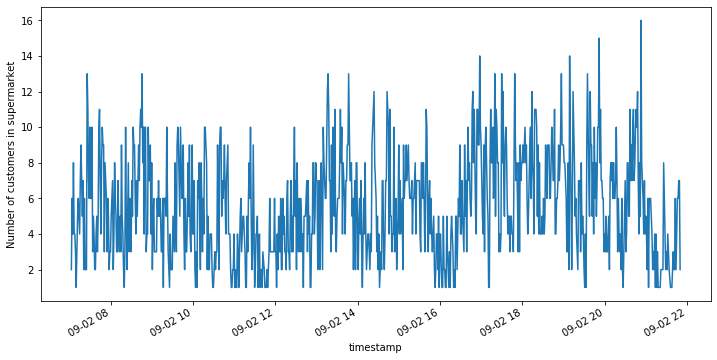

In [92]:
monday.groupby(['timestamp']).customer_no.count().plot()
plt.ylabel("Number of customers in supermarket")

In [93]:
monday.location.unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

In [110]:
monday['first_location'] = monday.groupby(['customer_no']).location.transform('first')

In [115]:
monday['following_location'] = monday.apply(lambda row: True if row['first_location'] != row['location'] else False, axis = 1)

In [116]:
monday.head(20)

,timestamp,customer_no,location,one,first_location,following_location
0,2019-09-02 07:03:00,1,dairy,1,dairy,False
1,2019-09-02 07:03:00,2,dairy,1,dairy,False
2,2019-09-02 07:04:00,3,dairy,1,dairy,False
3,2019-09-02 07:04:00,4,dairy,1,dairy,False
4,2019-09-02 07:04:00,5,spices,1,spices,False
5,2019-09-02 07:04:00,6,spices,1,spices,False
6,2019-09-02 07:04:00,7,spices,1,spices,False
7,2019-09-02 07:04:00,8,fruit,1,fruit,False
8,2019-09-02 07:05:00,1,checkout,1,dairy,True
9,2019-09-02 07:05:00,5,checkout,1,spices,True


In [131]:
monday[monday['following_location'] == True].location.value_counts()

checkout    1437
drinks       511
spices       390
dairy        382
fruit        378
Name: location, dtype: int64

In [130]:
monday[monday['following_location'] == False].location.value_counts()

fruit     627
dairy     513
spices    360
drinks    286
Name: location, dtype: int64

In [142]:
monday[monday['customer_no']==7]

,timestamp,customer_no,location,one,first_location,following_location
6,2019-09-02 07:04:00,7,spices,1,spices,False
11,2019-09-02 07:05:00,7,drinks,1,spices,True
28,2019-09-02 07:09:00,7,spices,1,spices,False
32,2019-09-02 07:11:00,7,fruit,1,spices,True
40,2019-09-02 07:13:00,7,checkout,1,spices,True


In [186]:
test.head()

,customer_no,location,one,first_location,following_location
timestamp,,,,,
2019-09-02 07:03:00,1.0,dairy,1.0,dairy,False
2019-09-02 07:03:00,2.0,dairy,1.0,dairy,False
2019-09-02 07:04:00,3.0,dairy,1.0,dairy,False
2019-09-02 07:04:00,4.0,dairy,1.0,dairy,False
2019-09-02 07:04:00,5.0,spices,1.0,spices,False


In [265]:
test = monday.copy()
test.set_index('timestamp')

,timestamp,customer_no,location,one,first_location,following_location
0,2019-09-02 07:03:00,1,dairy,1,dairy,False
1,2019-09-02 07:03:00,2,dairy,1,dairy,False
2,2019-09-02 07:04:00,3,dairy,1,dairy,False
3,2019-09-02 07:04:00,4,dairy,1,dairy,False
4,2019-09-02 07:04:00,5,spices,1,spices,False
...,...,...,...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout,1,fruit,True
4880,2019-09-02 21:49:00,1444,checkout,1,spices,True
4881,2019-09-02 21:49:00,1445,dairy,1,dairy,False
4882,2019-09-02 21:50:00,1446,dairy,1,dairy,False


In [256]:
test.index = test.timestamp

In [257]:
new_rows = test[test['customer_no'] == 7].resample('T').asfreq().ffill()
new_rows 

,timestamp,customer_no,location,one,first_location,following_location
timestamp,,,,,,
2019-09-02 07:04:00,2019-09-02 07:04:00,7.0,spices,1.0,spices,False
2019-09-02 07:05:00,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
2019-09-02 07:06:00,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
2019-09-02 07:07:00,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
2019-09-02 07:08:00,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
2019-09-02 07:09:00,2019-09-02 07:09:00,7.0,spices,1.0,spices,False
2019-09-02 07:10:00,2019-09-02 07:09:00,7.0,spices,1.0,spices,False
2019-09-02 07:11:00,2019-09-02 07:11:00,7.0,fruit,1.0,spices,True
2019-09-02 07:12:00,2019-09-02 07:11:00,7.0,fruit,1.0,spices,True


In [258]:
test[test['customer_no'] == 7]

,timestamp,customer_no,location,one,first_location,following_location
timestamp,,,,,,
2019-09-02 07:04:00,2019-09-02 07:04:00,7,spices,1,spices,False
2019-09-02 07:05:00,2019-09-02 07:05:00,7,drinks,1,spices,True
2019-09-02 07:09:00,2019-09-02 07:09:00,7,spices,1,spices,False
2019-09-02 07:11:00,2019-09-02 07:11:00,7,fruit,1,spices,True
2019-09-02 07:13:00,2019-09-02 07:13:00,7,checkout,1,spices,True


In [259]:
test.drop(columns=['timestamp'],inplace = True)

In [261]:
test = test.append(new_rows, ignore_index=False)

In [262]:
test

,customer_no,location,one,first_location,following_location,timestamp
timestamp,,,,,,
2019-09-02 07:03:00,1.0,dairy,1.0,dairy,False,NaT
2019-09-02 07:03:00,2.0,dairy,1.0,dairy,False,NaT
2019-09-02 07:04:00,3.0,dairy,1.0,dairy,False,NaT
2019-09-02 07:04:00,4.0,dairy,1.0,dairy,False,NaT
2019-09-02 07:04:00,5.0,spices,1.0,spices,False,NaT
...,...,...,...,...,...,...
2019-09-02 07:09:00,7.0,spices,1.0,spices,False,2019-09-02 07:09:00
2019-09-02 07:10:00,7.0,spices,1.0,spices,False,2019-09-02 07:09:00
2019-09-02 07:11:00,7.0,fruit,1.0,spices,True,2019-09-02 07:11:00


In [246]:
test2 = test.reset_index()

In [247]:
test2[test2['customer_no'] == 7].drop_duplicates()

,timestamp,customer_no,location,one,first_location,following_location
6,2019-09-02 07:04:00,7.0,spices,1.0,spices,False
11,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
28,2019-09-02 07:09:00,7.0,spices,1.0,spices,False
32,2019-09-02 07:11:00,7.0,fruit,1.0,spices,True
40,2019-09-02 07:13:00,7.0,checkout,1.0,spices,True
4886,2019-09-02 07:06:00,7.0,drinks,1.0,spices,True
4887,2019-09-02 07:07:00,7.0,drinks,1.0,spices,True
4888,2019-09-02 07:08:00,7.0,drinks,1.0,spices,True
4890,2019-09-02 07:10:00,7.0,spices,1.0,spices,False
4892,2019-09-02 07:12:00,7.0,fruit,1.0,spices,True


In [250]:
test2[test2['customer_no'] == 7].sort_values('timestamp')

,timestamp,customer_no,location,one,first_location,following_location
6,2019-09-02 07:04:00,7.0,spices,1.0,spices,False
4884,2019-09-02 07:04:00,7.0,spices,1.0,spices,False
4885,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
11,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
4886,2019-09-02 07:06:00,7.0,drinks,1.0,spices,True
4887,2019-09-02 07:07:00,7.0,drinks,1.0,spices,True
4888,2019-09-02 07:08:00,7.0,drinks,1.0,spices,True
28,2019-09-02 07:09:00,7.0,spices,1.0,spices,False
4889,2019-09-02 07:09:00,7.0,spices,1.0,spices,False
4890,2019-09-02 07:10:00,7.0,spices,1.0,spices,False


In [251]:
test2.sort_values('timestamp', inplace = True)
#.set_index(test2.timestamp, inplace = True)

In [253]:
test2.set_index(test2.timestamp, inplace = True)

In [254]:
test2[test2['customer_no'] == 7]

,timestamp,customer_no,location,one,first_location,following_location
timestamp,,,,,,
2019-09-02 07:04:00,2019-09-02 07:04:00,7.0,spices,1.0,spices,False
2019-09-02 07:04:00,2019-09-02 07:04:00,7.0,spices,1.0,spices,False
2019-09-02 07:05:00,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
2019-09-02 07:05:00,2019-09-02 07:05:00,7.0,drinks,1.0,spices,True
2019-09-02 07:06:00,2019-09-02 07:06:00,7.0,drinks,1.0,spices,True
2019-09-02 07:07:00,2019-09-02 07:07:00,7.0,drinks,1.0,spices,True
2019-09-02 07:08:00,2019-09-02 07:08:00,7.0,drinks,1.0,spices,True
2019-09-02 07:09:00,2019-09-02 07:09:00,7.0,spices,1.0,spices,False
2019-09-02 07:09:00,2019-09-02 07:09:00,7.0,spices,1.0,spices,False
